# Cutting signals and preprocessing

In [1]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

import signal_processing as sp

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
PATH = "../data/raw/airspyhf+"

In [3]:
files = [file for file in os.listdir(PATH) if file.endswith(".nfc") and "test" in file]
files.sort()
files

['test-tag1.nfc',
 'test-tag2.nfc',
 'test-tag3.nfc',
 'test-taoglas-AirspyHF+-2M.nfc']

In [4]:
tag3 = sp.read_signal(os.path.join(PATH, files[2]))

In [16]:
tag3_mag = np.abs(tag3[1])

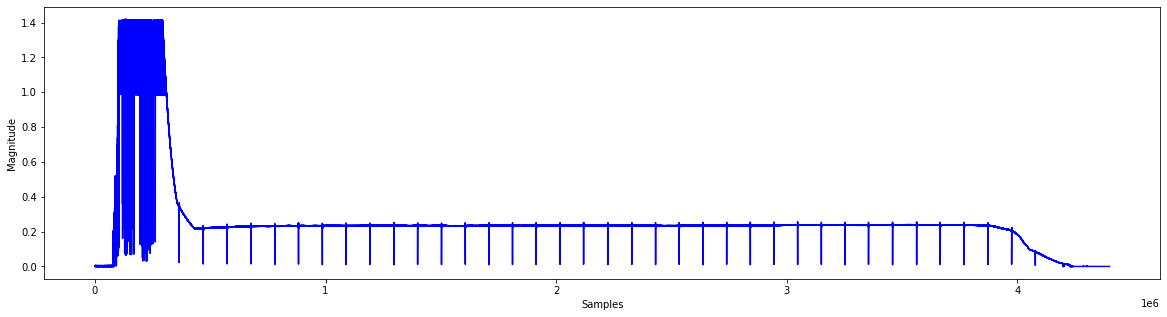

In [15]:
plt.plot(tag3_mag[int(2.7e6):int(7.1e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [17]:
tag3_cut = tag3_mag[int(2.7e6):int(7.1e6)]

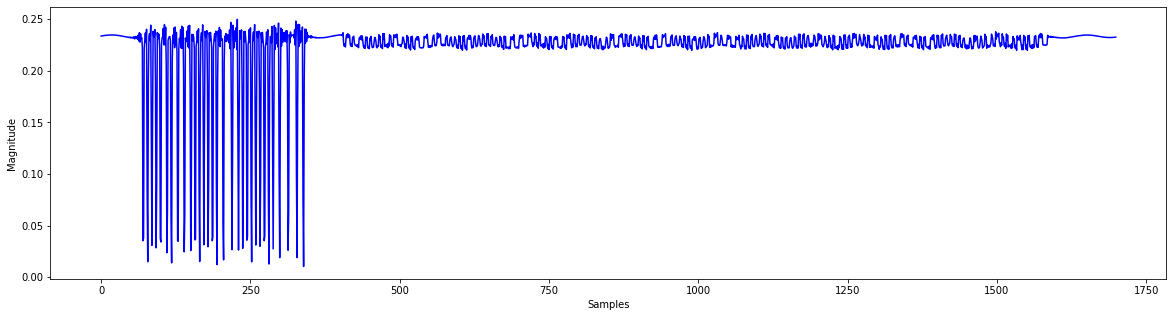

In [39]:
plt.plot(tag3_mag[int(3.789e6):int(3.7907e6)], 'b-',)
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

In [40]:
tag3_single = tag3_mag[int(3.789e6):int(3.7907e6)]

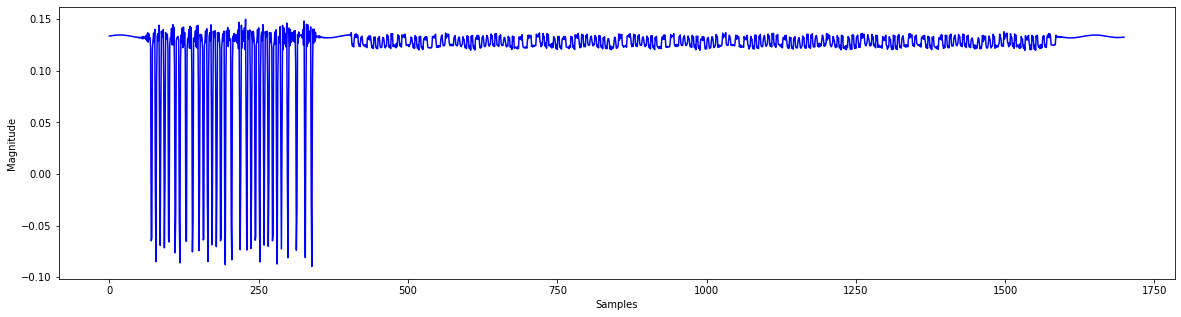

In [41]:
plt.plot(sp.shift_down(tag3_single, 0.1), 'b-')
plt.xlabel("Samples")
plt.ylabel("Magnitude")
plt.show()

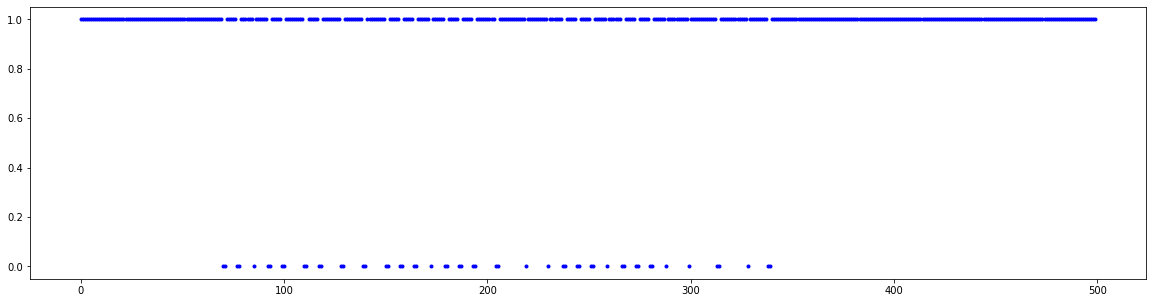

In [50]:
tag3_single_shifted = sp.shift_down(tag3_single, 0.1)
plt.plot(sp.binary_slicer(tag3_single_shifted[0:500]), 'b.')
plt.show()

In [51]:
tag3_single_miller = tag3_single_shifted[0:500]

In [52]:
sp.write_signal_to_file(tag3_single_miller, "tag3_single_miller.bin")